# 棄却法
逆関数では、もとになる分布を変換して、作りたい分布Pを生み出した。
棄却法では、もとになる乱数を潜在的には無限個用意し、そこからPを抽出する。
確率分布Pが定義されている空間を状態空間とよび、状態空間E上に定義された生成したい分布Pと
同じ状態空間に定義されている確率分布Qはそれぞれ確率密度関数p(x),q(x)をもち、
$$
r(x) = \frac{p(x)}{q(x)} \leq R,  \ x \in E
$$
となるRが存在するとする。

> 定理. $m = 1,2, \cdots$について、$Y_m$はQからの、$U_m$は一様分布からの乱数で、すべて独立とする。初めて$U_m \leq R^{-1}r(Y_m)$となった自然数mを$\tau$とかく。
> すると, $X = Y_\tau$ とおくいと、XはPに従う。さらに、$E[\tau] = R$

証明
まず、$Y$は$Q$に従う乱数、$U$は一様乱数とする。このとき$\tau$は、当選確率
$$
\theta = P(U \leq R^{-1} r(Y))
$$
のくじの当たるまでの回数である。したがって、$\tau$はパラメータ$\theta$の幾何分布に従い、平均は$\theta^{-1}$である。
次に、$\theta$をもとめる。Uは一様乱数だから、任意の$y$に対して、
$$
P(U \leq R^{-1} r(y)) = R^{-1}r(y)
$$
になる。ここで、yは定数としたが、Θの計算のさいには、Qに従う乱数である。
したがって、ΘはQでの期待値になり
$$
\theta = R^{-1}\int_{-infty}^{\infty} r(y)q(y)dy =  R^{-1}\int_{-infty}^{\infty} p(y)dy = R^{-1}
$$
したがって、$E[\tau]= \theta^{-1} = R$がわかる。
一方、Xの従う確率分布は、$U \leq R^{-1}r(Y)$の条件でのYの従う確率分布だから、累積分布関数は
$$
P(X \leq x) = P(Y\leq x | U \leq R^{-1}r(Y)) = \frac{P(Y\leq x,U \leq R^{-1}r(Y))}{P(U \leq R^{-1}r(Y))}
$$
分母は、$R^{-1}$になるので、分子を計算する。任意のyについて、
$$
P(y\leq x, U \leq R^{-1}r(y)) = R^{-1}r(y) \  (y \leq x), 0 \ (y > x)
$$
したがって、Pの累積分布関数をFとかくと
$$
P(X \leq x) = RR^{-1}\int_{-^\infty}^{x} r(y)q(y) dy = \int_{-^\infty}^{x} p(y) dy = F(x)
$$
となり、$P(X \leq x) = F(x)$ となり、XがPに従うことがわかる。

Remark.
Pに従う乱数を１回生成するのに必要なＱの乱数の個数の期待値はＲであるから、計算効率的にはRは小さければ小さいほどいい。

## ベータ分布の場合
$$
p(x| \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}
$$
分子の対数をとって、xで微分をすると
$$
\frac{\alpha -1 }{x} - \frac{\beta - 1}{1 - x}  = 0
$$
の解 $x*$は、
$$
x* = \frac{\alpha - 1}{\alpha + \beta -2}
$$
であり、x*で最大値をとる。だから、
$$
p(x|\alpha, \beta) \leq p(x*| \alpha, \beta) = (\frac{\alpha-1}{\alpha + \beta-2})^{\alpha-1}(\frac{\beta-1}{\alpha + \beta-2})^{\beta-1} \frac{1}{B(\alpha, \beta)} =: R
$$
となる。ここで、Y, Uを一様乱数とすると、Q= U(0,1)すなわち、q(y) = 1で
$r(y) = p(y|\alpha, \beta)$となる。すると、
$$
U \leq R^{-1}p(Y|\alpha, \beta)
$$
のときに、X=Yとして、修了するアルゴリズムを考えれば、得られた乱数はベータ分布に従う。しかし、α,β < 1のときには使えないことには注意

1.5461807307835764
真 平均:0.47619047619047616,分散:0.04796790511076225
サンプリング 平均:0.48280219135618424, 分散:0.055605522614155044
サンプリング回数 12634, 期待値:15461.807307835765


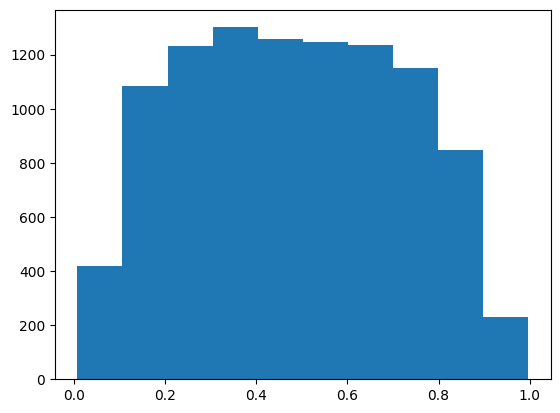

In [15]:
# β分布生成アルゴリズム
import numpy as np
from scipy.special import beta
import matplotlib.pyplot as plt
alpha = 2
beta_ = 2.2
R = (((alpha- 1)/(alpha + beta_ -2))**(alpha-1)) * (((beta_- 1)/(alpha + beta_ -2))**(beta_-1)) / beta(alpha, beta_)

def calc_yuudo(x, alpha, beta_):
    return (x**(alpha-1))*((1-x)**(beta_-1))/beta(alpha, beta_)

X = [] # ここに格納する。
size = 10000 # このサイズを作る
count = 0 # 何回ループしたか計算
while(len(X) < size):
    count += 1
    u = np.random.uniform()
    y = np.random.uniform()
    if u <= calc_yuudo(y, alpha, beta_):
        X.append(y)

plt.figure()
plt.hist(X)

print(R)
print(f'真 平均:{alpha/(alpha+beta_)},分散:{(alpha*beta_)/( ( (alpha+beta_)**2) *(alpha+beta_+1)) }')
print(f'サンプリング 平均:{np.mean(X)}, 分散:{np.var(X)}')
print(f'サンプリング回数 {count}, 期待値:{R*size}') 


## 事後分布の生成
+ 周辺密度関数 $p(x) = \int_\Theta p(x|\theta)p(\theta) d\theta$が与えられているとする
+ $\hat{\theta}$を$\theta$の最尤推定量とする。

このとき、事前分布を提案分布として、事後分布に従う乱数を生成したい

密度関数の割合は
$$
r(\theta) = \frac{p(\theta|x)}{p(\theta)} = \frac{p(x|\theta)p(\theta)}{p(x)p(\theta)} = \frac{p(x|\theta)}{p(x)}
$$
右辺は、分子しか$\theta$によらないので、Rは
$$
R = \frac{p(x|\hat{\theta})}{p(x)}
$$
ととればよい。

### 正規分布の平均パラメータΘに関する事後分布に従う乱数の生成

+ 観測データは $N(\theta, 1)$、事前分布はコーシー分布C(0,1)が定められている。
+ 提案分布を事前分布のコーシー分布として、棄却法により生成する

$p(x|\theta) = \frac{1}{\sqrt{2\pi}} \exp(-\frac{(x-\theta)^2}{2})$ より、$\hat{\theta}=x$のとき最大となる。

よって、$R =\frac{p(x|\hat{\theta})}{p(x)} = \frac{1}{\sqrt{2\pi}p(x)}$

$$
R^{-1}r(\theta) = \sqrt{2\pi}p(x) \frac{p(x|\theta)}{p(x)}= \exp(-\frac{(x-\theta)^2}{2})
$$
ゆえに次のアルゴリズムで、生成できる。

+ $\theta \sim C(0,1), U \sim U(0,1)$
+ $U \leq \exp(-\frac{(x-\theta)^2}{2})$ のとき$\theta$を採択する。

[3.133601757182845, 0.587909435252859, 5.469438042138546, 1.6622989430842205, -0.12979369768318058, -4.504687451985565, -1.2697406237640354, -1.624201384883218, 4.735331050781376, 1.2869511352849252, 1.7208661576885969, 2.1905097705864813, 12.76199336203885, 3.6589006134865607, 0.7824986195975969, 0.32460907628604596, -1.3591224996719753, 72.0093236982516, 24.97001427838462, 4.2844219263209355, -2.8071865607164335, -1.2279166491457065, -0.850660765765206, -32.20462552407851, 0.4107846894032535, -0.7506691254997085, 0.13007550905932963, 1.8149282541516893, -0.00012025638632850979, 0.7295036421435304, 0.25002427661665555, -8.22662909469553, -11.885301505906419, -0.11227305932384622, -0.2918039858474853, 0.9350327242225179, 3.0706561696801065, -0.05009386814064785, 1.4790681614872703, 0.3668698212746702, 0.307364791284399, 0.52142937916729, 0.8804686717580068, 0.16115718126692535, -0.44337516047221087, -0.45408869155526393, 0.848802391126888, 0.10030391429191944, -0.7070330466823074, 14.8

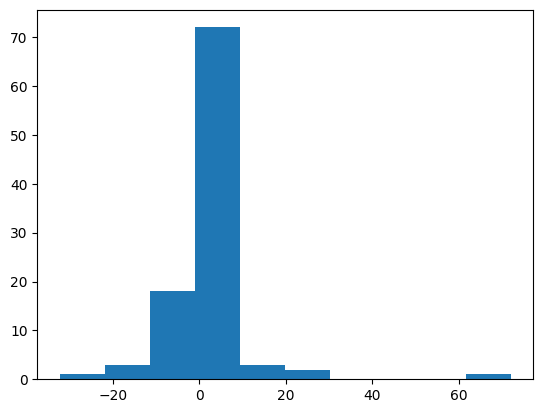

In [22]:

X = [] # ここに格納していく。
size = 100 # size個つくる
count = 0

while(len(X) < size):
    count += 1
    theta = np.random.standard_cauchy() # 平均パラメータが事前分布によって生成される。
    x = np.random.normal(theta, 1) # 観測データ
    u = np.random.uniform()
    if u <= np.exp(-(x-theta)**2/2):
        X.append(theta)
print(X)
plt.figure()
plt.hist(X, bins=int(np.sqrt(len(X))))
plt.show()